In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('India_GDP_Data.csv')

In [3]:
df.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80


In [4]:
df.isnull().sum()

Year                  0
GDP_In_Billion_USD    0
Per_Capita_in_USD     0
Percentage_Growth     0
dtype: int64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from autoviz import AutoViz_Class

Shape of your Data Set loaded: (61, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Year,61,int64,0,0.000000,100.000000,0,possible ID column: drop
GDP_In_Billion_USD,61,float64,0,0.000000,100.000000,0,skewed: cap or drop outliers
Percentage_Growth,59,float64,0,0.000000,96.721311,0,skewed: cap or drop outliers
Per_Capita_in_USD,58,int64,0,0.000000,95.081967,0,


    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


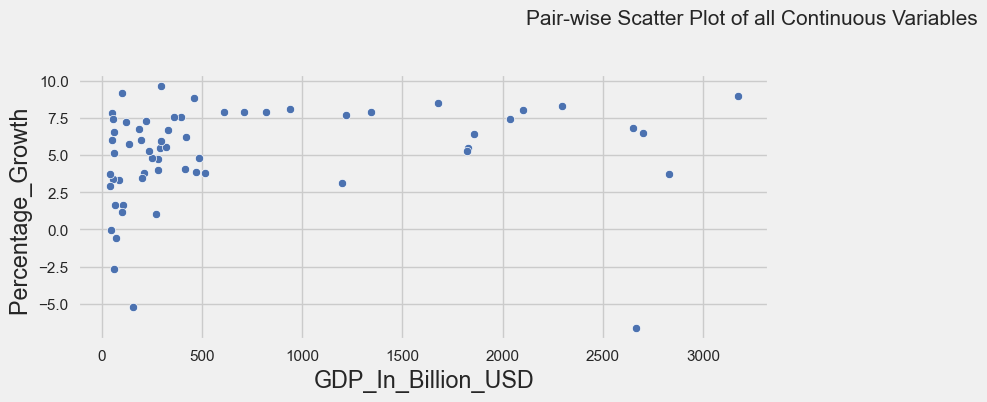

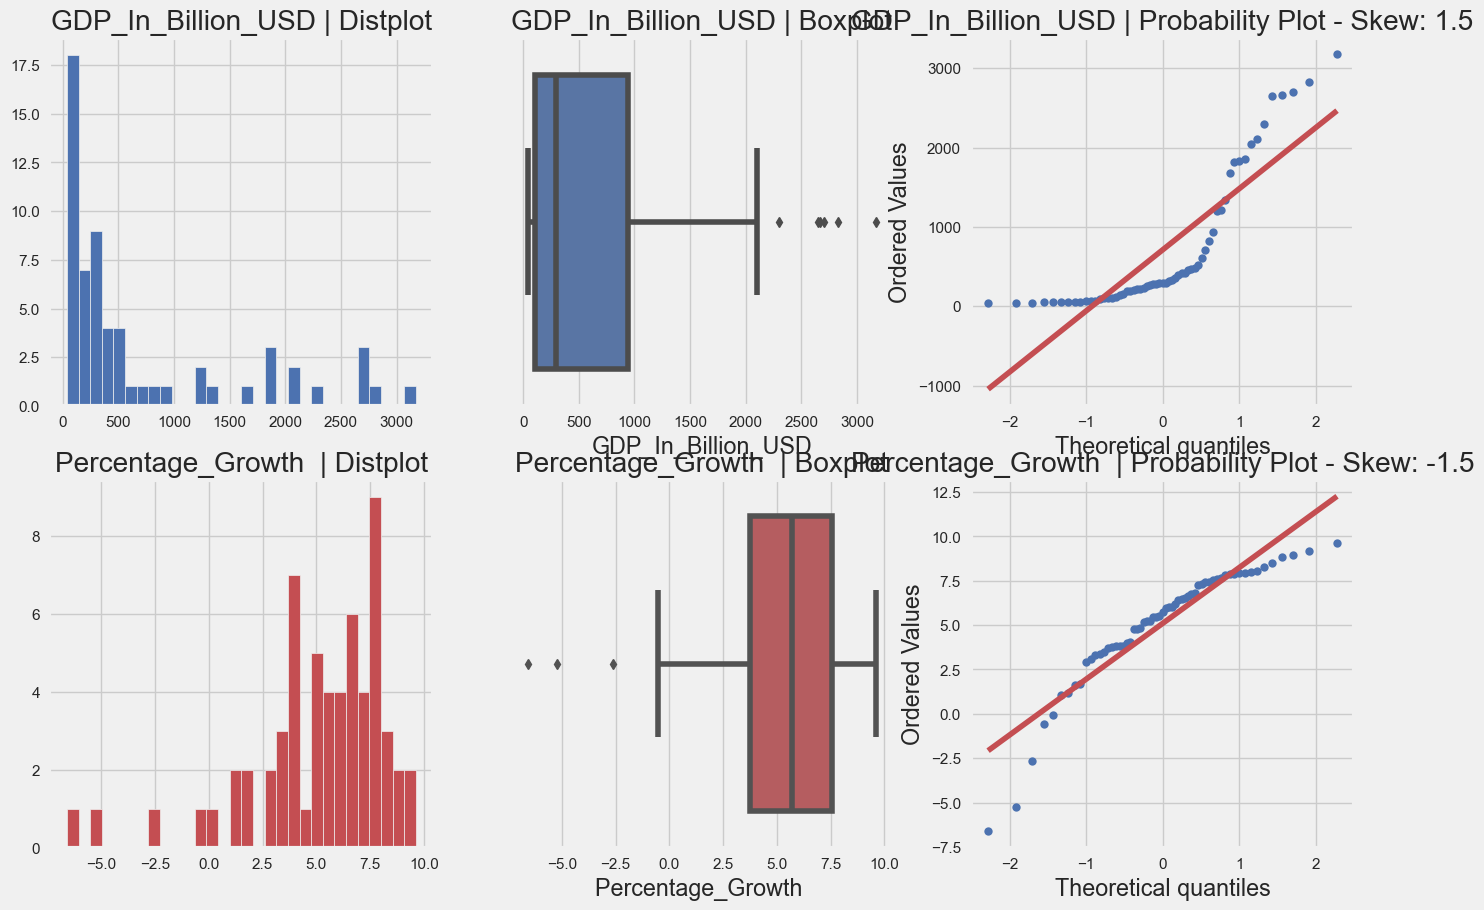

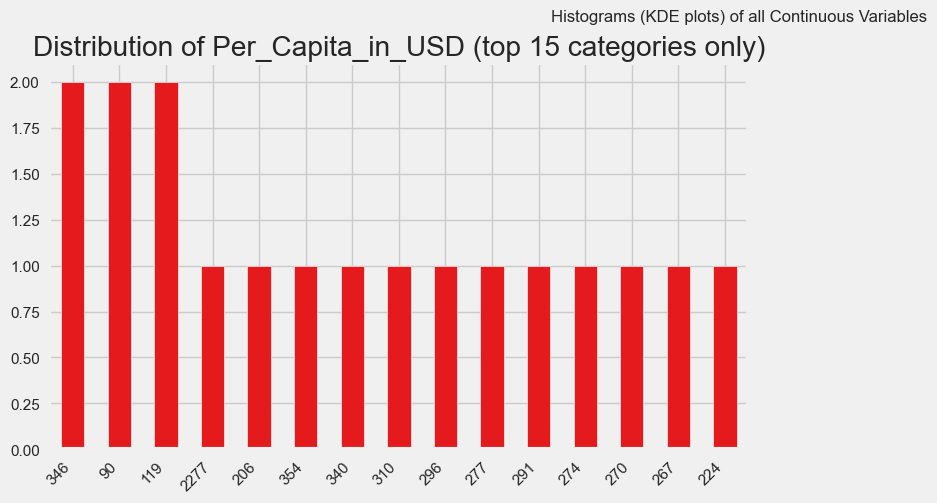

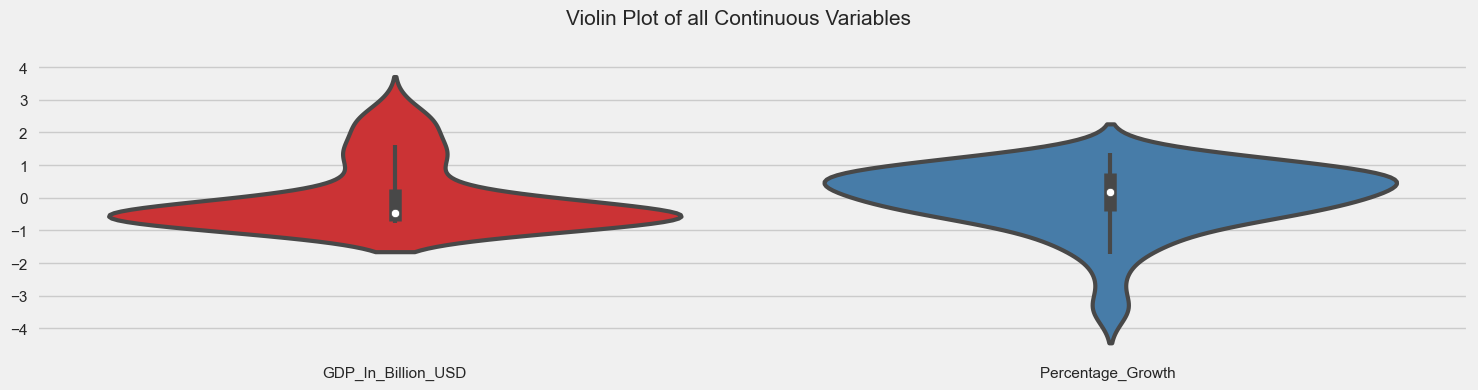

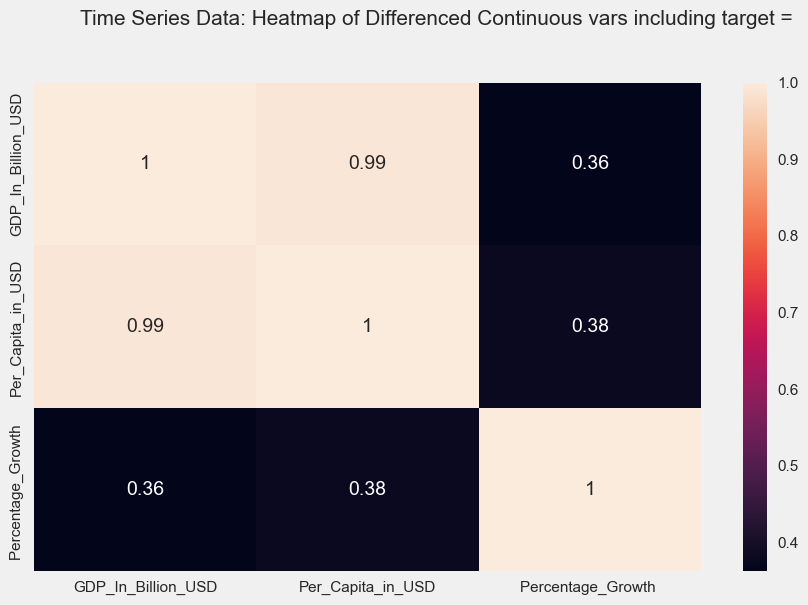

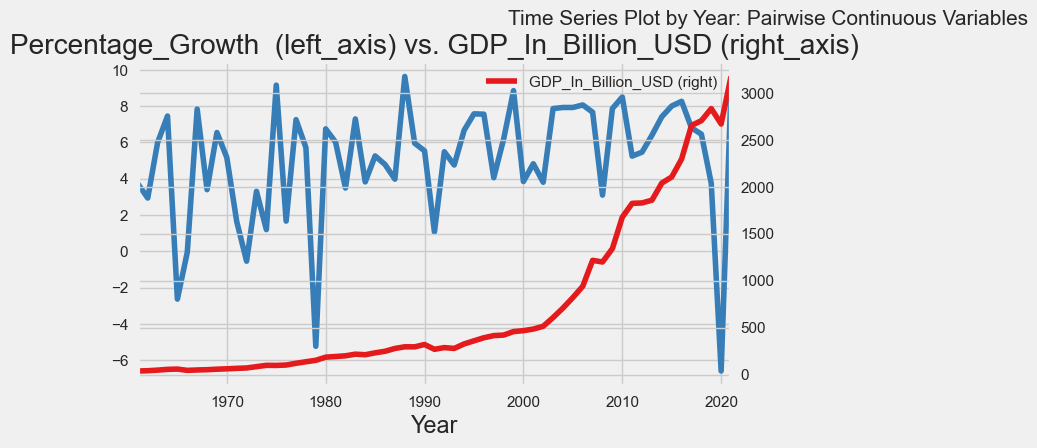

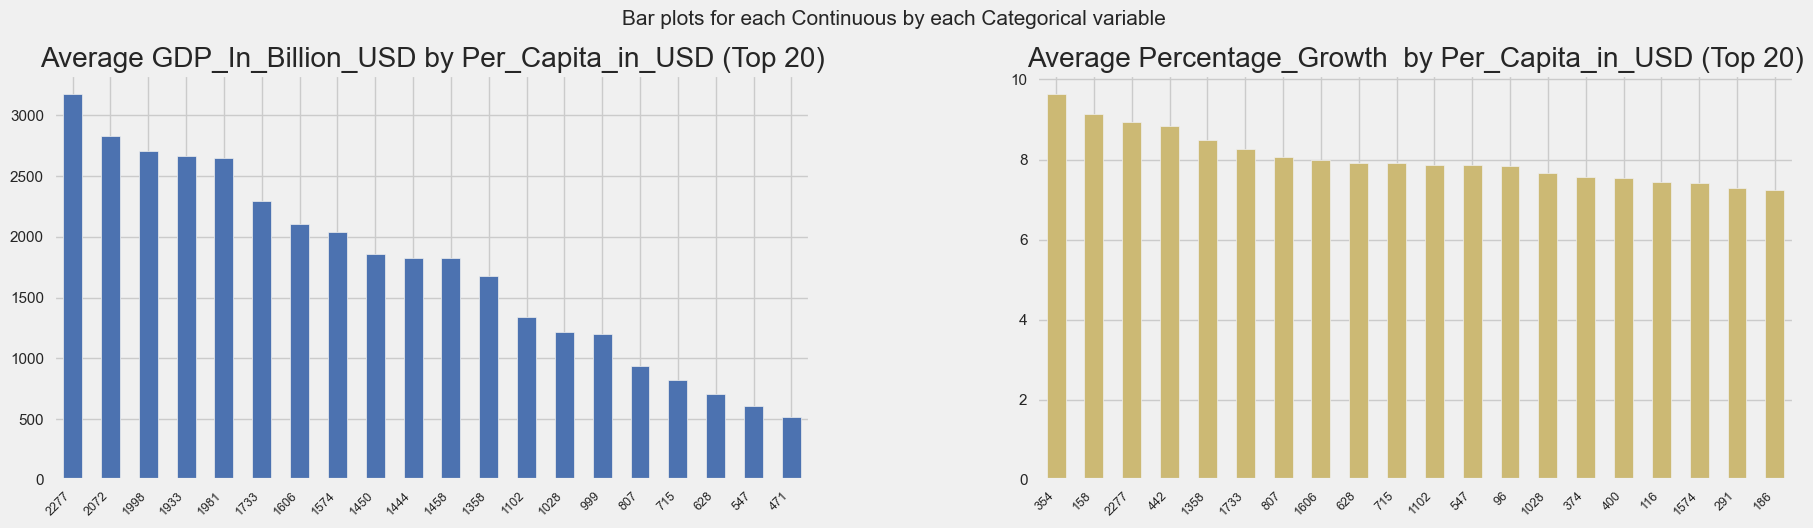

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [16]:
AV = AutoViz_Class()
dft = AV.AutoViz(filename='', dfte=df)

In [19]:
features = ['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD',]

In [20]:
features

['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD']

In [26]:
X = df[features]

In [27]:
target = df['Percentage_Growth ']

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=33)

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
scaled_x_train = scaler.transform(X_train)

In [36]:
scaled_x_test = scaler.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
tree_reg = DecisionTreeRegressor()

In [40]:
tree_reg.fit(scaled_x_train, y_train)

DecisionTreeRegressor()

In [41]:
pred = tree_reg.predict(scaled_x_test)

In [42]:
pred

array([ 6.54,  6.66,  4.78,  7.41,  7.41,  1.66,  5.53,  4.78,  7.66,
        5.46,  4.78,  1.66,  6.45,  1.66,  6.45,  6.18,  8.85, -0.55,
       -0.55])

In [44]:
residual_error = pred - y_test

In [43]:
import scipy as sp

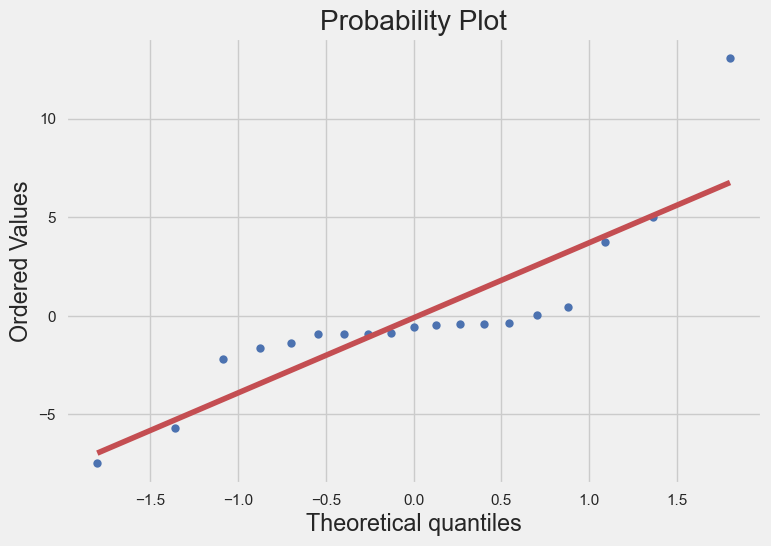

In [46]:
fig, ax = plt.subplots(dpi=100)
_ = sp.stats.probplot(residual_error, plot=ax)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
mean_absolute_error(y_test, pred)

2.4478947368421053

In [61]:
mean_squared_error(y_test, pred)

16.41058421052632

In [62]:
df['Percentage_Growth '].mean()

5.089344262295082

In [54]:
# testing with real time examples.


q = [2021, 3173.40, 2277]

In [55]:
q = scaler.transform([q])

In [56]:
q

array([[1.76136767, 3.04381551, 2.88524401]])

In [57]:
p = tree_reg.predict(q)

In [58]:
p

array([8.95])